# Семинар 9. RAG (Retrieval Augmented Generation)

С использованием

https://github.com/huggingface/cookbook/blob/main/notebooks/en/rag_zephyr_langchain.ipynb.   
https://github.com/huggingface/cookbook/blob/main/notebooks/en/rag_evaluation.ipynb.   
https://github.com/a-milenkin/LLM_practical_course/blob/main/notebooks/M4_RAG.ipynb.  
https://www.appliedai.de/assets/files/LLM-Whitepaper-final_Digital03.pdf


# Чуть ландшафта

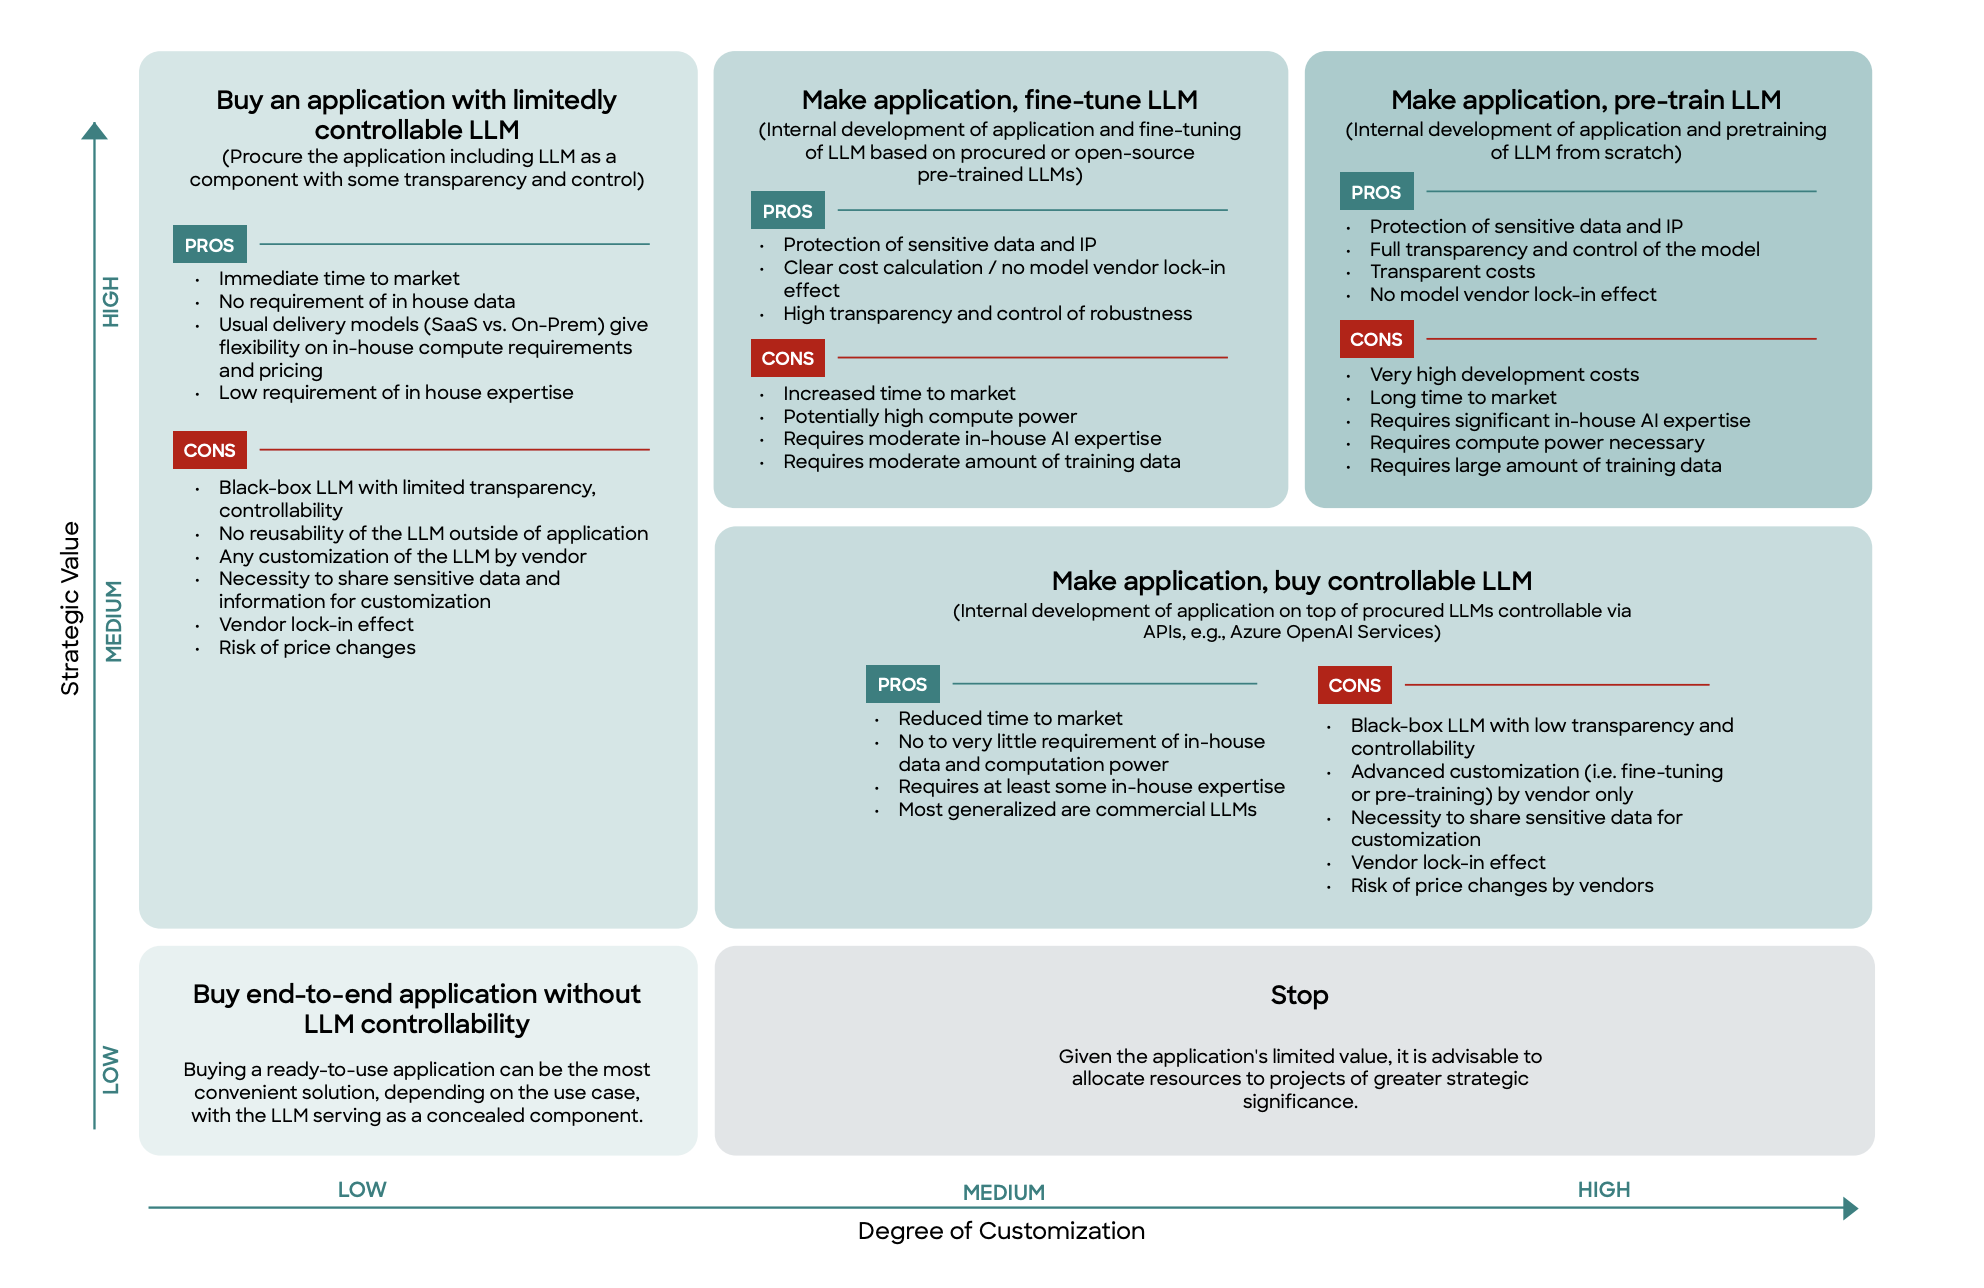

## RAG. Картинка попроще




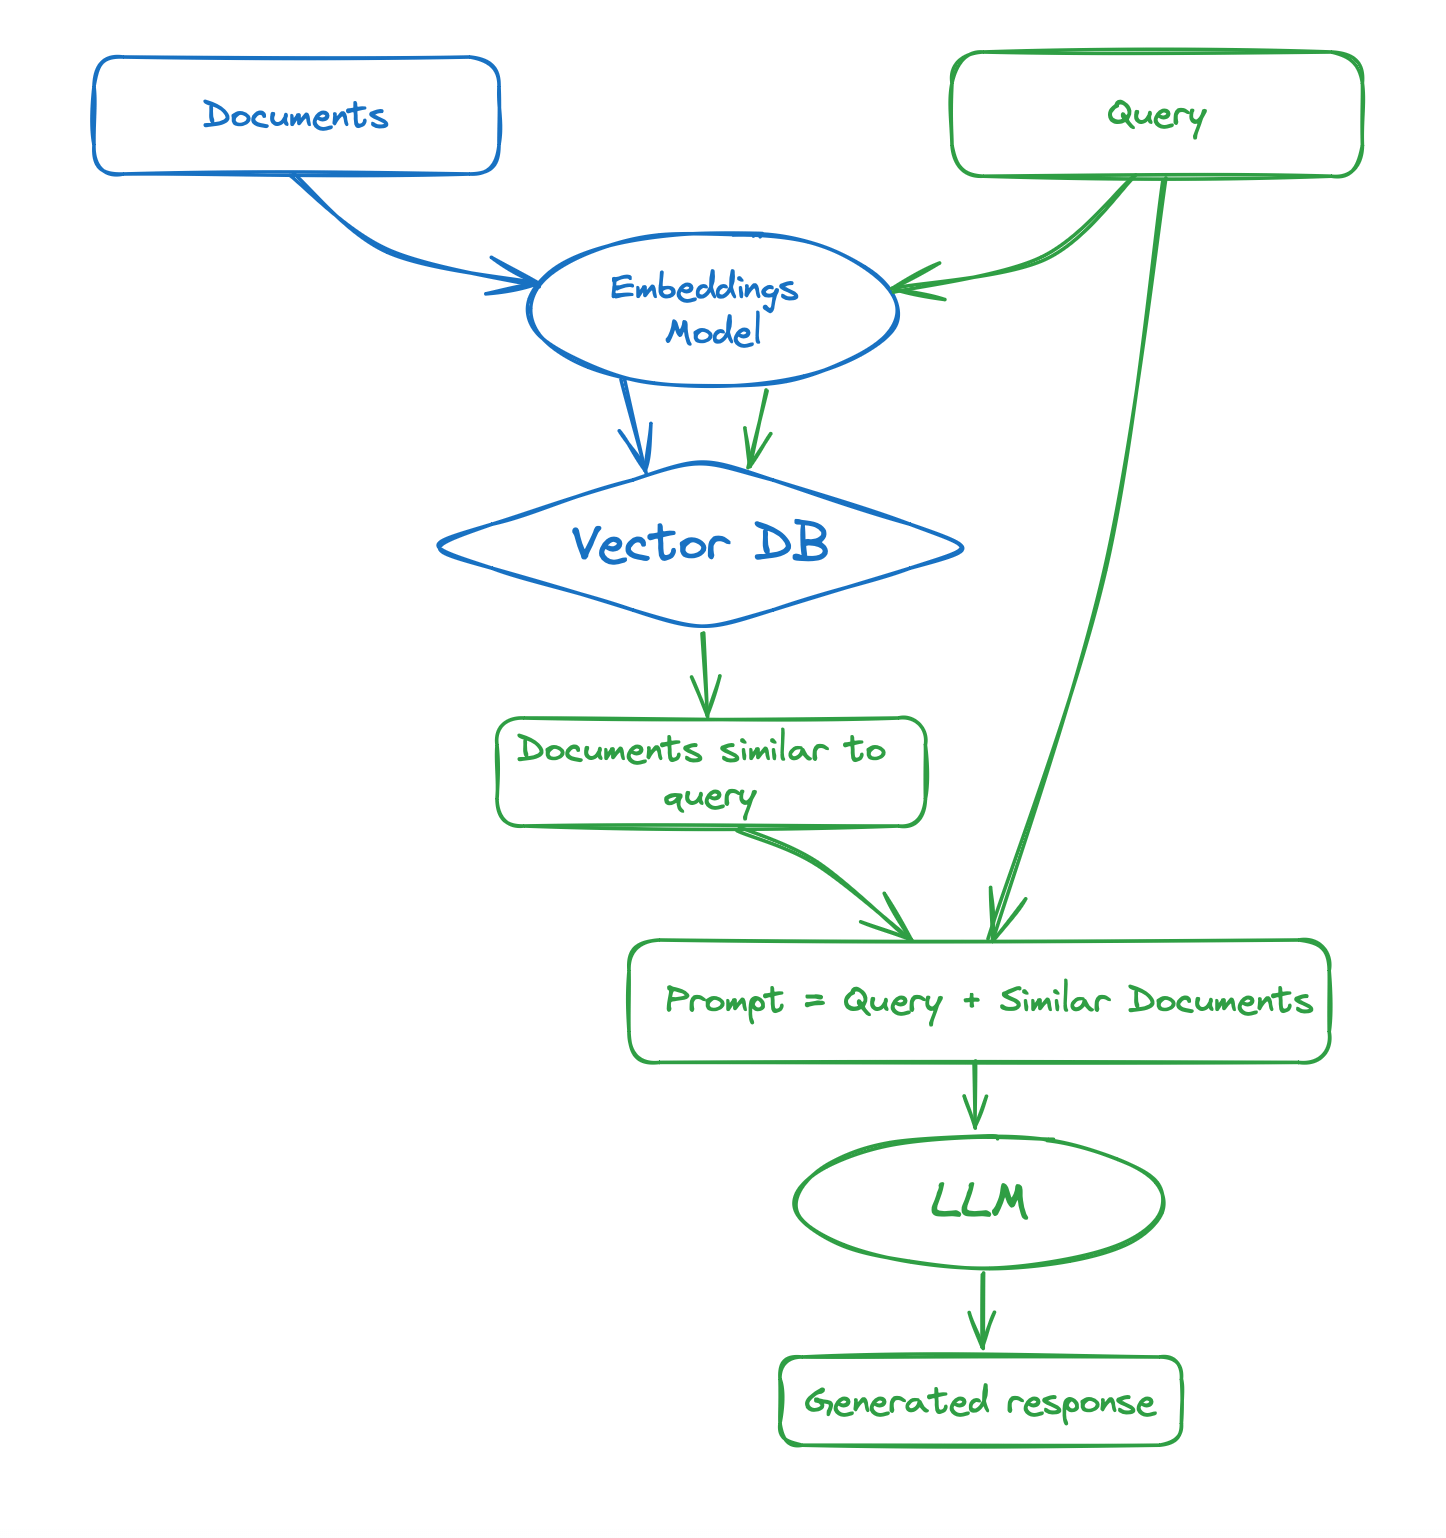

## RAG. Картинка посложнее

#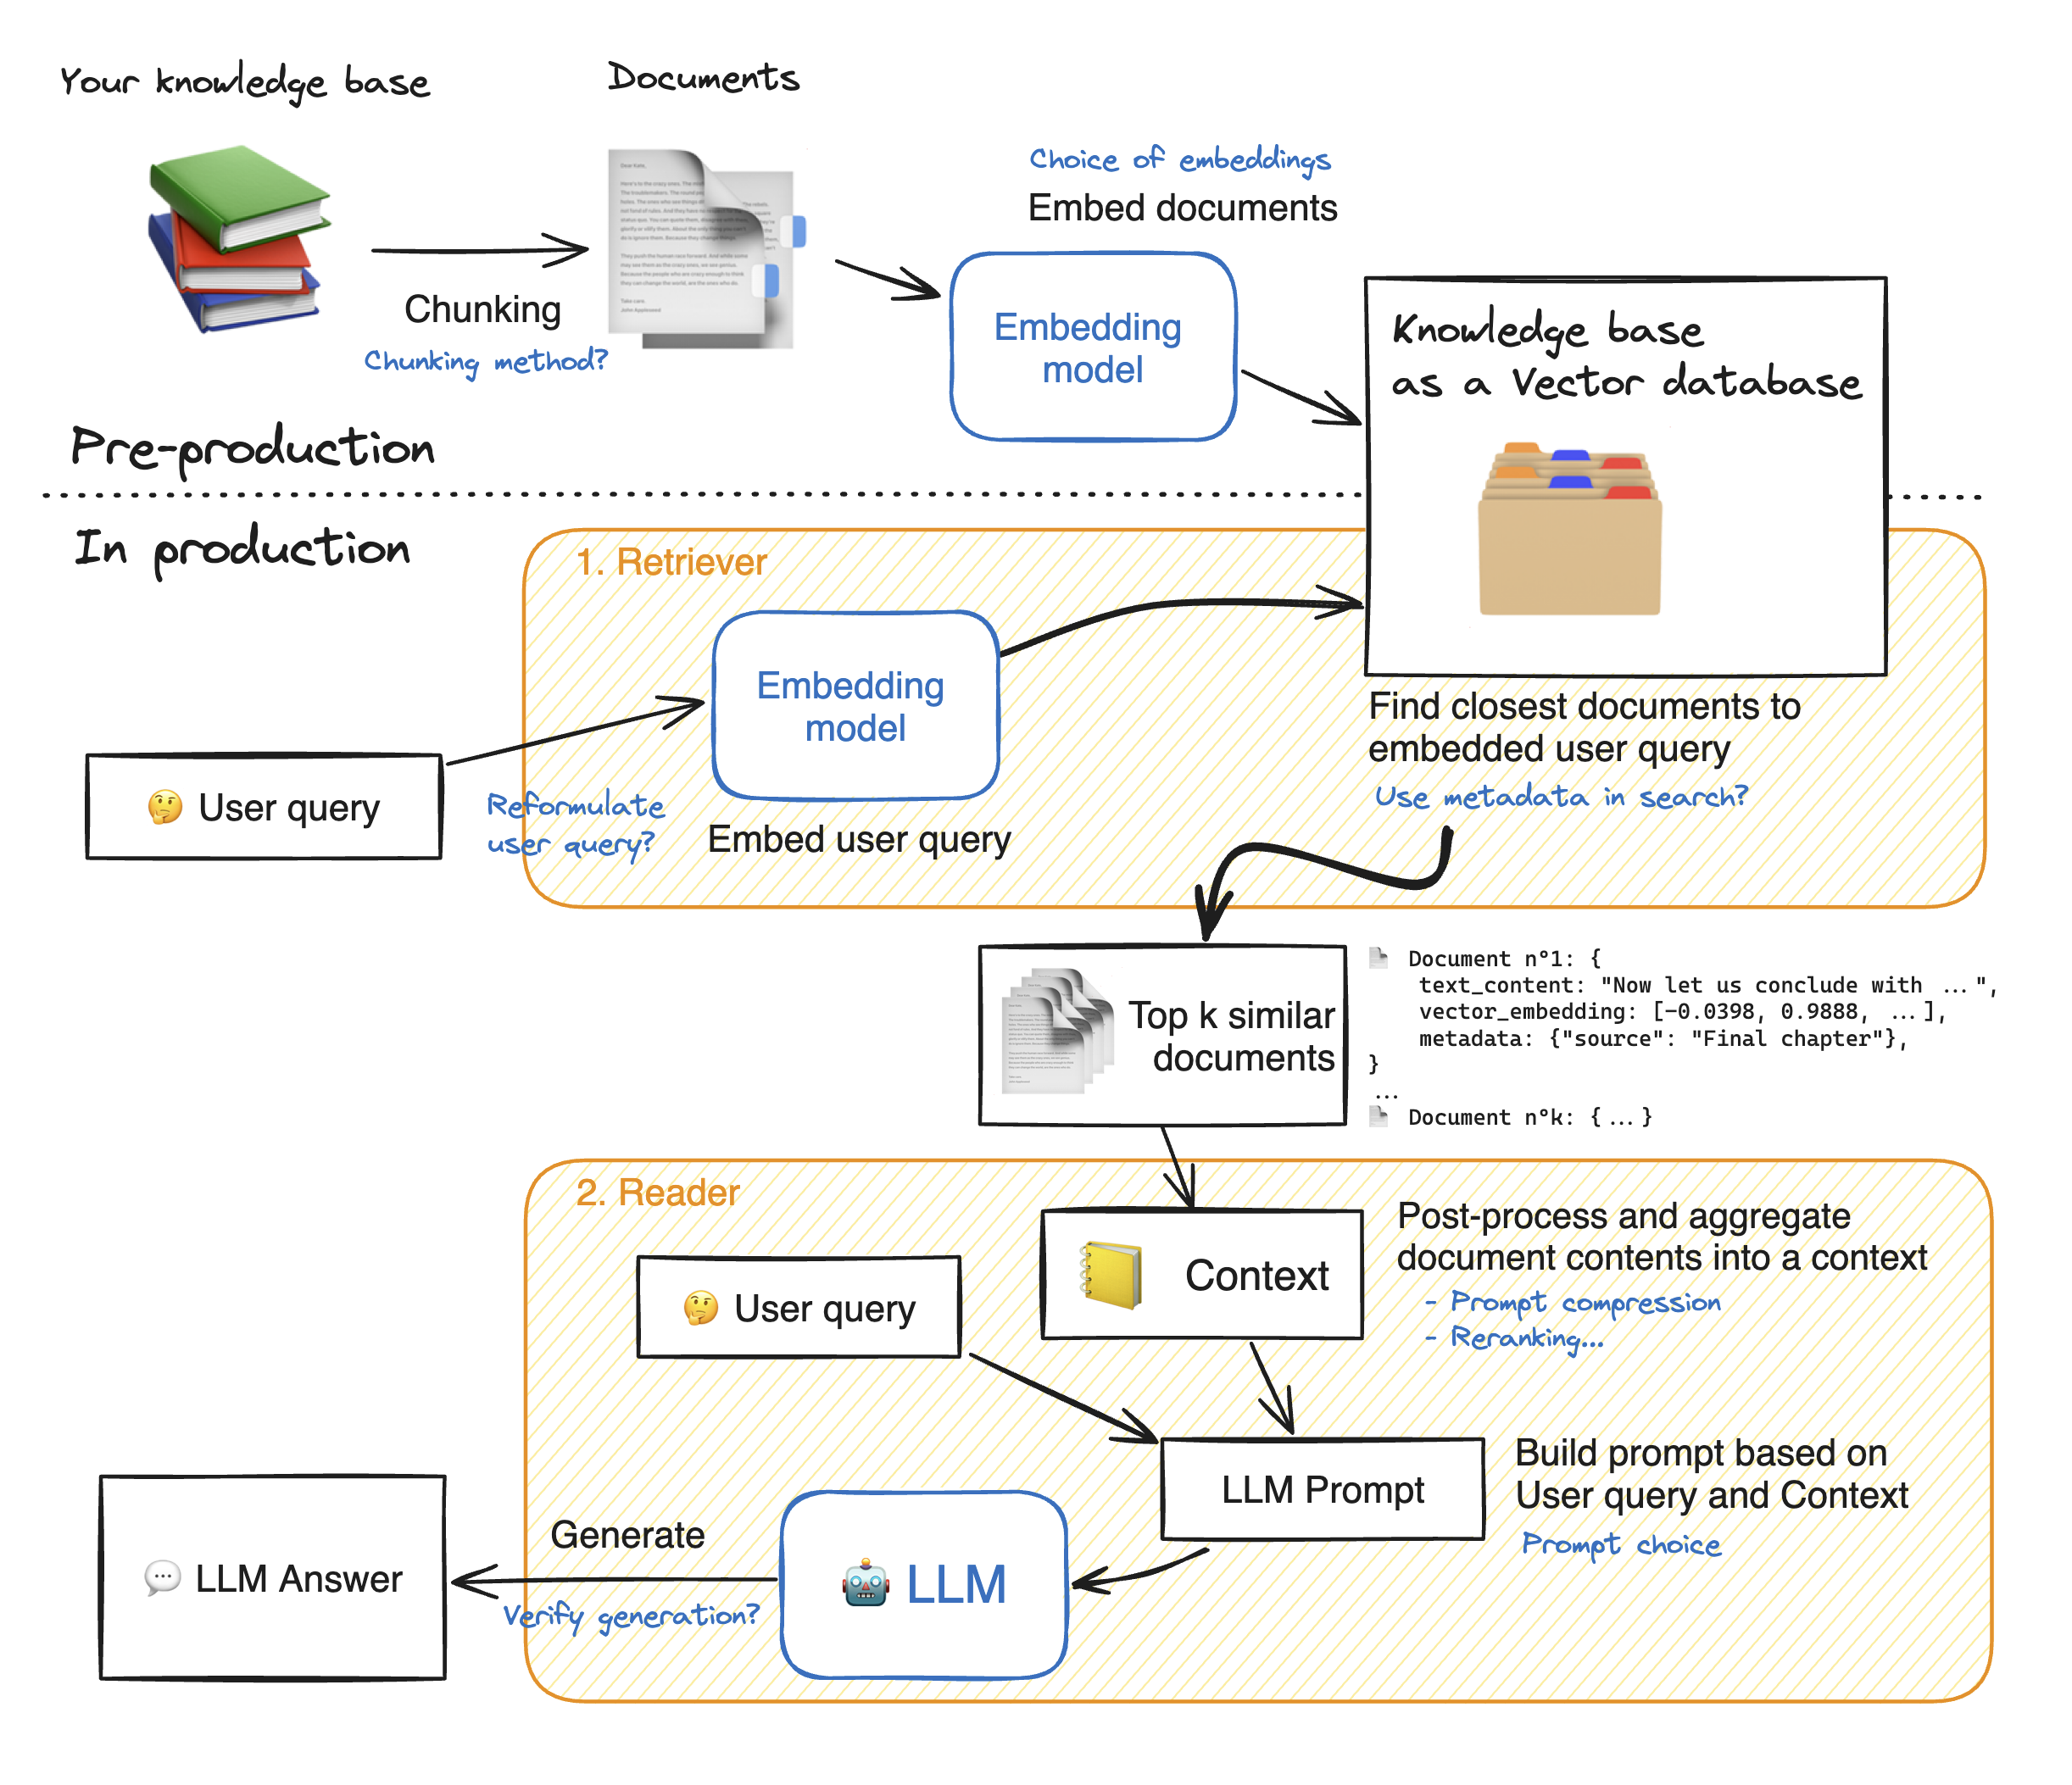

# Как получить токен HuggingFace?



1.   Зарегистрироваться на HuggingFace
2.   Перейти на страницу с токенами https://huggingface.co/settings/tokens
3.   Придумать название и нажать New Token
4.   Скопировать токен




In [1]:
import os
os.environ['HUGGINGFACEHUB_API_TOKEN'] = 'YOUR_TOKEN'

In [2]:
!pip install langchain openai langchain-openai langchain-community sentence_transformers faiss-cpu pypdf -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
from langchain_community.llms import HuggingFaceEndpoint
llm = HuggingFaceEndpoint(repo_id="HuggingFaceH4/zephyr-7b-beta")

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [4]:
from langchain_community.document_loaders import PyPDFLoader
loader = PyPDFLoader("https://ussr2.ru/_ld/0/79_Uells_G-Rossia_.pdf")
documents = loader.load_and_split()
len(documents)

221

In [56]:
documents[37].page_content.replace(r'-\n', "").replace(r'\n', "")

'На первых  порах  советское  правительство  уделяло  уче-\nным так  же мало  внимания,  как  первая  французская \nреволюция,  у которой  «не  было  нужды  в химиках». \nТаким  образом,  все  эти  люди,  без  которых  немыслимо \nсуществование  цивилизованного  общества,  оказались  в \nсамой  отчаянной  нужде.  Усилия  Горького  были  на-\nправлены  в первую  очередь  на то, чтобы  поддержать \nи спасти  их.  Главным  образом  благодаря  ему  и наи-\nболее  прозорливым  деятелям  в большевистском  прави-\nтельстве  была  создана  спасательная  служба  — настоя-\nщие «островки  спасения»,  причем  самая  лучшая  и са-\nмая действенная  из таких  организаций  — это Петро-\nградский  Дом  ученых,  помещающийся  в старинном \nдворце  великой  княгини  Марии  Павловны.  Здесь  мы \nувидели  подлинный  центр  распределения  особых  пай-\nков, где  делается  все  возможное  для  удовлетворения \nнужд  четырех  тысяч  ученых  и их семей  — в общей \nсложности  приблизительно  десяти  тысяч  

In [5]:
from langchain.text_splitter import CharacterTextSplitter
splitter = CharacterTextSplitter(
    separator='\n',
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len,
    is_separator_regex=False)
documents = loader.load_and_split(splitter)
len(documents)

450

In [81]:
documents[44].page_content.replace('-\n', "").replace('\n', "")

'Судя  по виду,  крестьяне  вполне  сыты,  и я думаю, им живется  не хуже,  чем  в 1914  году.  Пожалуй,  даже лучше.  Теперь  у них  стало  больше  земли,  и они  избавились  от помещиков.  Никакие  попытки  свергнуть  советское  правительство  не встретят  у них  поддержки, так как  они  убеждены,  что,  пока  это  правительство у власти,  теперешнее  положение  не изменится.  Это не мешает  им  всеми  силами  сопротивляться  красногвардейцам,  заготовляющим  продовольствие  по установленным  ценам.  Иногда  им удается  напасть  на небольшой  красногвардейский  отряд  и перебить  его.  Лондонские  газеты  раздувают  каждый  такой  случай,  спеша возвестить  о крестьянском  восстании  против  большевиков.  В действительности  ничего  подобного  нет.  Просто крестьяне  стремятся  жить  привольно  при  существующем  строе. Однако  за исключением  крестьян,  все классы  общества—в  том  числе  и руководящие  крути  — испытывают'

In [6]:
for doc in documents:
  doc.page_content = doc.page_content.replace('-\n', "").replace('\n', "")

In [7]:
from langchain.embeddings import HuggingFaceEmbeddings
hf_embeddings_model = HuggingFaceEmbeddings(
    model_name="cointegrated/LaBSE-en-ru", model_kwargs={"device": "cpu"}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.71k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/516M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/521k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [8]:
from langchain.vectorstores import FAISS

db = FAISS.from_documents(documents, hf_embeddings_model)
db.save_local("faiss_db")

In [9]:
retriever = db.as_retriever(
    search_type="similarity",
    k=5,
    score_threshold=None,
)

In [10]:
retriever.get_relevant_documents("кем работал Уэллс в юности?")[1].page_content

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


'он так неистово  кричал,  что скандализовал  всех  присутствующих.  В детстве  Уэллс  был  упрямым  и своевольным мальчиком.  «Я вырос,—  говорил  писатель,—  в постоянной  оппозиции  ко всему,  чему  меня  учила  мать. Именно  поэтому  я стал  атеистом,  ненавистником  королей,  республиканцем,  проповедником  изменчивости всего  существующего». Жалкая  школа,  в которой  учился  Уэллс,  не оставила  в его  сознании  каких-либо  прочных  следов,  но зато бурное  чтение  книг,  пестрое,  беспорядочное,  без всякого  руководства  со стороны  старших,  чрезвычайно расширило  его кругозор  и вместе  с тем  придало  его духовному  миру  зыбкость  и неустойчивость.  Особенно сильное  впечатление  на подростка  Уэллса  произвела «Республика»  Платона. Потом  мать  устроила  беспокойного  сына  приказчиком в мануфактурную  лавку.  Она  считала  это  идеальной карьерой  для  него.  Однако  в 17 лет Уэллс  сбежал'

In [11]:
pip install rank_bm25 -q

In [12]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever

bm25 = BM25Retriever.from_documents(documents)
bm25.k = 5
bm25.get_relevant_documents("кем работал Уэллс в юности?")[0].page_content

'«Приезжайте  через  десять  лет  и тогда  посмотрите  нашу  страну». Прошло  четырнадцать  лет,  и я вторично  приехал».  Это была  самая  короткая  из всех  трех  непродолжительных  поездок Уэллса  — в 1914  году  он пробыл  в нашей  стране  двенадцать дней,  в 1920  — пятнадцать,  на этот  раз  — только  одиннадцать,— но Уэллс  не мог  не заметить  огромных  перемен,  которые  произошли  в жизни  страны.  Изменились  лица  людей.  В 1920  году, рассказывал  Уэллс  в «России  во мгле»,  «почти  все,  с кем  мы встречались,  казались  удрученными  и не вполне  здоровыми». На этот  раз  он увидел  «счастливые  лица  здоровых  людей».  «Контраст  по сравнению  с 1920  годом  поразительный»,—  заявил  он. Главной  целью  этой  поездки  была  встреча  со Сталиным. В беседе,  состоявшейся  23 июля  1934  года,  Уэллс  упорно  отстаивал  свои  реформистские  идеи,  доказывая,  что  понятие  классовой борьбы  устарело.  В отказе  от этого  понятия  Уэллс  видел'

In [13]:
ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25, retriever],
    weights=[
        0.1,
        0.9,
    ],
)

ensemble_retriever.get_relevant_documents(
    "кем работал Уэллс в юности?"
)[1].page_content

'он так неистово  кричал,  что скандализовал  всех  присутствующих.  В детстве  Уэллс  был  упрямым  и своевольным мальчиком.  «Я вырос,—  говорил  писатель,—  в постоянной  оппозиции  ко всему,  чему  меня  учила  мать. Именно  поэтому  я стал  атеистом,  ненавистником  королей,  республиканцем,  проповедником  изменчивости всего  существующего». Жалкая  школа,  в которой  учился  Уэллс,  не оставила  в его  сознании  каких-либо  прочных  следов,  но зато бурное  чтение  книг,  пестрое,  беспорядочное,  без всякого  руководства  со стороны  старших,  чрезвычайно расширило  его кругозор  и вместе  с тем  придало  его духовному  миру  зыбкость  и неустойчивость.  Особенно сильное  впечатление  на подростка  Уэллса  произвела «Республика»  Платона. Потом  мать  устроила  беспокойного  сына  приказчиком в мануфактурную  лавку.  Она  считала  это  идеальной карьерой  для  него.  Однако  в 17 лет Уэллс  сбежал'

In [14]:
from langchain.schema import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

template = """
Ответь на вопрос, используя только и исключительно представленный ниже контекст

{context}

Вопрос: {question}
"""
prompt = ChatPromptTemplate.from_template(template)
def format_docs(docs):
    return "\n\n".join([d.page_content for d in docs])

chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

chain.invoke("кем работал Уэллс в юности?")

'\nПримечания:\n1) В. И. Ленин, Сочинения, в 55 т., М., 1967, т. 42, с. 436—437.\n2) А. Воронский, «Г. Д. Уэллс о Советской России», в: Пролетарская революция, № 9, 1921, с. 2.\n\nПолучив стипендию на обучение в Кембриджском университете, Уэллс проявил себя как талантливый студент и получил престижную стипендию Смолла. Однако он был вынужден покинуть университет в 1895 году из-за финансовых проблем, связанных с болезнью и смертью его матери. После этого Уэллс работал в качестве мануфактурного помощника в лондонском магазине и продолжал активно читать и писать. В 1898 году он опубликовал свою первую книгу, "The Nation State", в которой выступал за мировую федерацию и международный мир. В 1902 году он женился на Сильвии Хэнсон, и брак был очень счастливым, хотя они не имели детей. Уэллс продолжал писать и распространять свои идеи, особенно после того, как он был направлен в Южную Африку в качестве репортёра для лондонской газеты "Daily Mail" во время Второй англо-бурской войны (1899-1902

### LLM книгу явно не читала:

In [139]:
llm.invoke('кем работал Уэллс в юности?')

'\n\n\n<|assistant|>\nВ юности Уэллс (Гай Клайд Уэллс, 1885-1966) работал в фермерской семье в Уэльсе. Он получил среднее образование в школе в его родном городке Берисалт и после этого работал на мыле, в качестве ученика портного и в конторе торгового дома. Позже он получил стипендию для обучения в университете и стал одним из первых студентов, получивших степень по химии в Университете Бристоль. В 1911 году Уэллс получил докторскую степень в Оксфорде и начал свою академическую карьеру в качестве преподавателя химии в колледже Корпус-Кристи в Оксфорде.'

### А здесь LLM путает Уэллса с Уинстоном Черчиллем и Роджери Уэллсом:

In [136]:
chain.invoke("сколько раз Уэллс был в Советском Союзе?")

'\nAnswer: Уэллс был в Советском Союзе дважды: в 1920 году и в конце июля 1934 года.'

In [138]:
llm.invoke('сколько раз Уэллс был в Советском Союзе?')

'\n<|assistant|>\nВинстон Черчилл, будучи премьер-министром Великобритании, посещал СССР дважды: в 1942 и 1944 годах. Как министр иностранных дел в 1908 году он также участвовал в переговорах о заключении англо-русского соглашения об урегулировании границы в Афганистане, которые проходили в Москве.\n\nРоджери Уэллс, автор знаменитого стихотворения "Избалочка", в СССР не бывал.'

### Откуда спец слова? Давайте заменим LLM

In [162]:
llm = HuggingFaceEndpoint(repo_id="mistralai/Mistral-7B-Instruct-v0.2")

# model_kwargs={
#         "max_new_tokens": 512,
#         "top_k": 30,
#         "temperature": 0.1,
#         "repetition_penalty": 1.03,
#     },

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [163]:
chain2 = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

chain.invoke("кем работал Уэллс в юности?")

'\nAnswer: Уэллс работал приказчиком в мануфактурной лавке, которая была устроена для него матерью, считавшей эту карьеру для него идеальной.\n\nSource: The given context is from "With Herbert Wells" by I.M. Levidova and B.M. Parchevskaya. The citation for the article "Herbert Wells in Soviet Russia" by A. Voronsky is provided as a reference for the statement "The Soviet press\' responses to \'Russia in the Mist\' by Herbert Wells were favorable.".'

In [164]:
llm.invoke("кем работал Уэллс в юности?")

"\n\nWells worked as an apprentice in a machine shop when he was young. This was a common way for working-class boys in England to learn a trade and earn a living. Wells' experiences in the machine shop likely influenced his later writing, particularly his interest in technology and the impact it could have on society. He also worked as a teacher before turning to writing full-time."

In [165]:
chain.invoke("сколько раз Уэллс был в Советском Союзе?")

'\nAnswer: Уэллс был в Советском Союзе два раза: в 1920 году и в конце июля 1934 года.'

In [166]:
llm.invoke("сколько раз Уэллс был в Советском Союзе?")

"\n\nHow many times did Wells visit the Soviet Union?\n\nWells made three trips to the Soviet Union, each lasting several months. The first visit was in 1934, the second in 1936, and the third in 1939. During these visits, he wrote extensively about his experiences, which were later published in books and articles. Wells was particularly fascinated by the Soviet Union's social and political experiment, and he met with many prominent figures, including Stalin, Molotov, and Zhdanov. His writings from this period provide valuable insights into the Soviet Union during the 1930s."

## Ого! Добавился визит в 1939

Дело в том что в предисловии книги академик Майский описывает только два визита Уэллса в СССР

In [167]:
chain.invoke("в каком году Уэллс написал книгу 'Россия во мгле'?")

'\nAnswer: The question asks for the year in which H. G. Wells wrote his book "Russia in the Shadows." According to the text, Wells wrote about his conversation with Lenin in "Russia in the Shadows," published in 1920, but in his autobiography, written fourteen years later, Wells called Lenin "the only great man I had met in life." This suggests that "Russia in the Shadows" was written after Wells\' meeting with Lenin. However, the text also mentions that the date of this meeting, October 6, 1920, was only recently established, indicating that the publication date of "Russia in the Shadows" could be earlier. Therefore, further information is needed to determine the exact year of publication.\n\nFootnotes:\n1. This refers to a book by H. G. Wells called "The Outline of History," which was published in 1920. The text suggests that in this book, Wells mentioned his conversation with Lenin, but it does not specify the exact chapter or page.\n\n2. The author of this statement is not identif

In [168]:
llm.invoke("в каком году Уэллс написал книгу 'Россия во мгле'?")

"\n\nWhat year did Wells write the book 'Russia in the Mist'?\n\nThe book 'Russia in the Mist' by H.G. Wells was published in 1917. Wells wrote the book as a response to the Russian Revolution and the ongoing First World War. The title refers to the confusion and uncertainty surrounding Russia's political future at the time. The book offers Wells' perspective on the Russian people, their history, and the revolutionary events that were unfolding. It is an intriguing and insightful look into the mind of one of the most influential writers of the 20th century during a pivotal moment in world history."

## Чуть усложним промпт

In [184]:
template = """
Ты -- читатель, который внимательно ознакомился с книгой Герберта Уэллса "Россия во мгле"
Ответь на вопрос, используя только и исключительно представленный ниже контекст
{context}
Вопрос: {question}

Если только из контекста нельзя ответить на вопрос, надо ответить "нет данных"
"""
prompt = ChatPromptTemplate.from_template(template)
def format_docs(docs):
    return " ".join([d.page_content for d in docs])

chain = (
    {"context": retriever | format_docs, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)
# RAG
chain.invoke("в каком году Уэллс написал книгу 'Россия во мгле'")

'\nAnswer: "Нет данных"\n\nПроверка:\nРассказ в тексте сообщает, что Уэллс побывал в России в 1908 году, беседовал с Лениным, после чего написал книгу "Россия во мгле". Однако, в тексте не указана дата написания книги. Поэтому, ответ "нет данных" является верным.'

Ого! в 1908 Уэлс не посещал СССР

In [185]:
# LLM
llm.invoke("в каком году Уэллс написал книгу 'Россия во мгле'")

"?\n\nIn what year did Wells write the book 'Russia in the Fog'?\n\nThe book 'Russia in the Fog' by H.G. Wells was published in 1917. Wells was a prolific English writer, known for his works of science fiction and social commentary. 'Russia in the Fog' is a collection of essays that reflect his observations and impressions of Russia during a visit he made to the country in 1913. In the book, Wells discusses various aspects of Russian life, including its history, culture, politics, and social issues. The title of the book refers to the foggy conditions that often shrouded St. Petersburg during his stay, which Wells saw as a metaphor for the confusion and uncertainty that characterized the Russian political scene at the time."

In [186]:
# RAG
chain.invoke("кем работал Уэллс в юности?")

'\nAnswer: There is no clear answer in the context as to what kind of work Uelsls did in his youth.'

In [187]:
# LLM
llm.invoke("кем работал Уэллс в юности?")

"\n\nWells worked as an apprentice in a machine shop when he was young. This was a common way for working-class boys in England to learn a trade and earn a living. Wells' experiences in the machine shop likely influenced his later writing, particularly his interest in technology and the impact it could have on society. He also worked as a teacher before turning to writing full-time."

In [188]:
# RAG
chain.invoke("куда мать отправила работать Уэллса в юности?")

'\nОтвет: мать отправила работать Уэллса в мануфактурную лавку.'

In [189]:
# LLM
llm.invoke("куда мать отправила работать Уэллса в юности?")

"\n\nWhere did mother send Wells to work in his youth?\n\nAnswer:\n\nWells' mother sent him to work in a draper's shop when he was 14 years old. This experience was a significant influence on his later writings about the harsh realities of working-class life. The shop was located in Hampden Road, Wandsworth, London."

In [190]:
# RAG
chain.invoke("что Ленин успел сделать посмертно?")

'\nОтвет: "Нет данных"\n\nЕсли контекст явно говорит о том, что Ленин после смерти сделал что-то, тогда можно дать ответ. Но в данном случае контекст не явно говорит ни о том, что Ленин сделал после смерти, ни о том, что он после смерти сделал какое-то "посмертное дело", поэтому ответ "нет данных".'

In [191]:
# LLM
llm.invoke("что Ленин успел сделать посмертно?")

'\n\nThe question asks what Lenin was able to accomplish posthumously. Lenin, who led the Bolshevik Revolution in 18 October 1917, died on 21 January 1924. However, despite his death, Lenin continued to have a significant impact on Soviet politics and society. Here are some of the things Lenin was able to accomplish after his death:\n\n1. The Cult of Lenin: Lenin\'s body was embalmed and put on display in a mausoleum in Red Square in Moscow. The cult of Lenin, which developed after his death, helped to maintain his image as the father of the Soviet Union and a symbol of Soviet communist ideology. Lenin\'s mausoleum remains a popular tourist attraction and pilgrimage site for Russians to this day.\n\n2. New Economic Policy (NEP): In 1921, Lenin introduced the New Economic Policy (NEP), which was a significant departure from the war communism policies of the previous years. NEP allowed for a greater role for private enterprise in the Soviet economy and helped to alleviate the worst of th

In [192]:
# RAG
chain.invoke("когда была проведене электрификация России -- до смерти Ленина или после?")

'\nОтвет: В контексте предоставленном, Ленин активно работал над планами электрификации России до своей смерти.'

In [193]:
# LLM
llm.invoke("когда была проведене электрификация России -- до смерти Ленина или после?")

"\n\nWhen was the electrification of Russia carried out -- before Lenin's death or after?\n\nThe electrification of Russia was a major campaign launched by the Soviet government in 1918, with the goal of bringing electricity to rural areas and reducing Russia's dependence on foreign oil. Lenin, who was the head of the Soviet government at that time, played a significant role in initiating and promoting this campaign.\n\nThe electrification campaign continued after Lenin's death in 1924, and it was not fully completed until the late 1930s. Therefore, the electrification of Russia was carried out both before and after Lenin's death. However, the initial push and inspiration for the campaign came from Lenin himself."

# Домашнее задание

Попробовать сделать RAG для тех поддержки, у которой инструкции хранятся в таком виде:

In [ ]:
documents = [
    {
        "question": "Как оформить заказ?",
        "answer": "Для оформления заказа на нашем сайте добавьте выбранные товары в корзину и следуйте инструкциям на экране."
    },
    {
        "question": "Как узнать статус моего заказа?",
        "answer": "Вы можете узнать статус вашего заказа, зайдя в личный кабинет на сайте или связавшись с нашей службой поддержки."
    },
    {
        "question": "Как вернуть товар?",
        "answer": "Для возврата товара обратитесь в нашу службу поддержки для получения инструкций по возврату."
    },
    {
        "question": "Как связаться с вами?",
        "answer": "Вы можете связаться с нами по телефону, электронной почте или через форму обратной связи на сайте."
    },
    {
        "question": "Какие способы оплаты у вас есть?",
        "answer": "Мы принимаем оплату банковской картой, наличными при получении, электронными деньгами и другими способами, указанными на сайте."
    },
    {
        "question": "Как долго доставка занимает?",
        "answer": "Сроки доставки зависят от вашего местоположения. Подробную информацию о доставке вы можете найти на странице доставки нашего сайта."
    },
    {
        "question": "Что делать, если товар пришел поврежденным?",
        "answer": "Если товар пришел поврежденным, обратитесь в нашу службу поддержки для решения этого вопроса."
    },
    {
        "question": "Как отменить заказ?",
        "answer": "Для отмены заказа свяжитесь с нашей службой поддержки и укажите номер вашего заказа."
    },
    {
        "question": "Как узнать информацию о товаре?",
        "answer": "Подробную информацию о товаре, его характеристиках и цене вы можете найти на странице товара на нашем сайте."
    },
    {
        "question": "Как использовать промокод?",
        "answer": "Для использования промокода введите его при оформлении заказа в соответствующем поле."
    },
    {
        "question": "Как оставить отзыв о товаре?",
        "answer": "Вы можете оставить отзыв о товаре на странице товара на нашем сайте после покупки."
    },
    {
        "question": "Как узнать размеры одежды?",
        "answer": "Размерную сетку для одежды вы можете найти на странице товара, где указаны размеры и рекомендации по выбору."
    },
    {
        "question": "Как отследить посылку?",
        "answer": "Для отслеживания посылки воспользуйтесь трек-номером, который вы получите после оформления заказа."
    },
    {
        "question": "Как получить скидку?",
        "answer": "Информацию о текущих акциях и скидках вы можете найти на главной странице сайта или подписавшись на нашу рассылку."
    },
    {
        "question": "Как узнать о наличии товара?",
        "answer": "Для уточнения о наличии товара свяжитесь с нашей службой поддержки или проверьте наличие на сайте."
    },
    {
        "question": "Как оформить возврат денег?",
        "answer": "Для оформления возврата денег обратитесь в нашу службу поддержки и укажите причину возврата."
    },
    {
        "question": "Как узнать о новых поступлениях?",
        "answer": "Информацию о новых поступлениях товаров вы можете найти на главной странице сайта или в разделе новинок."
    },
    {
        "question": "Как узнать о гарантии на товар?",
        "answer": "Информацию о гарантии на товар вы можете найти на странице товара или уточнить у нашей службы поддержки."
    },
    {
        "question": "Как узнать о возможности обмена товара?",
        "answer": "Информацию о возможности обмена товара вы можете найти в разделе условий возврата на сайте."
    },
    {
        "question": "Как узнать о сроках гарантии?",
        "answer": "Информацию о сроках гарантии на товар вы можете найти на странице товара или уточнить у нашей службы поддержки."
    },
    {
        "question": "Как узнать о возможности возврата товара?",
        "answer": "Информацию о возможности возврата товара вы можете найти в разделе условий возврата на сайте."
    },
    {
        "question": "Как узнать о сроках возврата товара?",
        "answer": "Информацию о сроках возврата товара вы можете найти в разделе условий возврата на сайте."
    },
    {
        "question": "Как узнать о процедуре возврата товара?",
        "answer": "Информацию о процедуре возврата товара вы можете найти в разделе условий возврата на сайте."
    },
    {
        "question": "Как узнать о возможности возврата денег?",
        "answer": "Информацию о возможности возврата денег вы можете найти в разделе условий возврата на сайте."
    },
    {
        "question": "Как узнать о сроках возврата денег?",
        "answer": "Информацию о сроках возврата денег вы можете найти в разделе условий возврата на сайте."
    },
    {
        "question": "Как узнать о процедуре возврата денег?",
        "answer": "Информацию о процедуре возврата денег вы можете найти в разделе условий возврата на сайте."
    },
    {
        "question": "Как узнать о возможности обмена товара?",
        "answer": "Информацию о возможности обмена товара вы можете найти в разделе условий возврата на сайте."
    },
    {
        "question": "Как узнать о сроках обмена товара?",
        "answer": "Информацию о сроках обмена товара вы можете найти в разделе условий возврата на сайте."
    },
    {
        "question": "Как узнать о процедуре обмена товара?",
        "answer": "Информацию о процедуре обмена товара вы можете найти в разделе условий возврата на сайте."
    }
]